Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 12**: Consider the one-dimensional, time-independent Schroedinger equation describing a particle with wave function $\psi(x)$ and energy $E$: $$-\frac{\hbar^{2}}{2\,m}\,\frac{d^{2}\psi(x)}{dx^{2}} + V(x)\,\psi(x) = E\,\psi(x).$$ Values for the constants $m$, $\hbar$ and others required for the calculation in SI units are given in the code cell below. (Note: the energy unit eV is taken as elementary charge $e$ times Volts with $e$ given as a constant.]

**Tasks**: 

**(a)** Consider a square potential well with $V(x)=0$ in between two infinitely high walls separated by a distance $L$ equal to the Bohr radius, i.e. for all x in the interval $[0,L]$. Write a function `solve(energy, func)` which takes the parameter energy and a python function $func$. This function should solve the Schroedinger ODE for the case described above and return only the final value of $\psi(L)$ at the boundary $L$. 

Write a function `eqn(x, y, energy)` containing the two first-order differential equations equivalent to the Schroedinger equation. Use this function as input for the `solve(energy, func)` function. This detailed naming scheme is required for the first tests of your code.

Write a script using the function `solve(energy, func)` to calculate the ground state energy of an electron in this potential well in units of eV (i.e. divide result by elementary charge value). For the initial condition, see technical hint below. For the number of values to solve for $\psi(x)$ the value 1000 is recommended. 

The result of your calculation should be a number between 134 eV and 135 eV. One of the tests will assess your `solve(energy, func)` function for a distorted potential well.

**(b)** Consider the harmonic potential $$V(x)=V_{0}\,x^{2}/a^{2},$$ where $V_{0}$ and $a=10^{-11}$ m are constants. Limit the infinite range of the variable $x$ to the interval $[-10a, 10a]$ with $V_{0}=50$ eV. The harmonic oscillator is known to have equidistant energy eigenvalues. Check that this is true, to the precision of your calculation, by calculating the ground state and the first 2 excited states. (Hint: the ground state has energy in the range 100 to 200 eV. You may wish to program a different `solve2(energy)` function to part (a) for this exercise.)

In order to test your result, write a function `result()` which must return the difference of calculated energy eigenvalues in eV as a single number. As stated above, the absolute difference between the ground and first state and the first and second state should be very close to equal. Either of those two numbers should be returned. Consider that this is merely a function to enable automated testing and hence should really only return the requested value. Calculations should take place earlier in your code so that `result()` can run without an input argument.

**(c)** Plot the normalized wavefunctions, for the ground state energy and the two excited state energies as obtained without normalization in part (b), in the interval $[-5a,5a]$ (bounds for plotting, no re-calculation required). Note that normalization of a wavefunction requires the calculation of the integral of the square of the wavefunction $\int|\psi(x)|^{2}dx$ and subsequent division of $\psi(x)$ by the square root of the integral. 

Provide a plot title and appropriate axis labels, plot all three wavefunctions onto a single canvas using color-coded lines and also provide suitable axis limits in x and y to render all curves well visible. 

**Technical Hint**: This is not an initial value problem for the Schroedinger ODE but a boundary value problem! This requires additional effort, a different method to the previous ODE exercises and is hence an 'unseen' problem. 

Take a simple initial condition for both problems at $x_{0}=0$ or $x_{0}=-10a$, respectively: $\psi(x_{0})=0$ and $d\psi(x_{0})/dx=1$. Use that as a starting point to solve the ODE and vary the energy, $E$, until a solution converges. The task is to evaluate the variation of the energy variable until the second boundary condition (for instance at L for exercise (a)) is satisfied since the first boundary condition is already satisfied due to the choice of initial condition. 

This requires an initial guess for the energy interval in which the solution might be and a computational method for root finding. Search scipy for root finding methods and select one which does not require knowledge of the derivative. Root finding is appropriate here since the boundary condition to satisfy is $\psi(x)=0$ to a given precision. Another hint would be to consider the required precision since in SI units, absolute values for $E$ are very small indeed.

**Technical Hint 2**: part (a) requires using `solve_ivp` in order to solve the boundary value problem in combination with a root finder function. The SciPy boundary value solver, `solve_bvp`, can be used for parts (b) and (c), if you wish. The root finding, `solve_ivp` method will also work, however.

**Quantum physics background** For those lacking the first year quantum module, the boundary condition for both exercises is that $\psi(x)=0$ at each potential boundary. These are only fulfilled at specific, discrete energy values $E$, called energy eigenvalues, where the smallest of these is called the ground state energy.

In [1]:
""" My code """
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import bisect
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt


""" required physical constants given in SI units"""
m_el = 9.1094e-31  # mass of electron in [kg]
hbar = 1.0546e-34  # Planck's constant over 2 pi [Js]
e_el = 1.6022e-19  # electron charge in [C]
L_bohr = 5.2918e-11  # Bohr radius [m]

# YOUR CODE HERE


def eqn(x, y, energy):
    """Schrodinger's Equation"""
    _ = x
    w_, dw_ = y
    f_0 = dw_
    f_1 = (-2.0 * m_el / (hbar * hbar)) * w_ * energy  # dw = -2m/h^2 Ew
    return [f_0, f_1]


def solve(energy, func):
    """Solving Function"""
    x_range = [0, L_bohr]
    x_eval = np.linspace(x_range[0], x_range[1], 1000)
    init = [0, 1]
    answer = solve_ivp(func, x_range, init, args=(energy,), t_eval=x_eval)
    return answer.y[0, -1]


gr_en = bisect(solve, 130 * e_el, 140 * e_el, args=(eqn,), xtol=1e-22) / e_el
print(f"The ground state energy is at {gr_en}eV")


The ground state energy is at 134.1827392578125eV


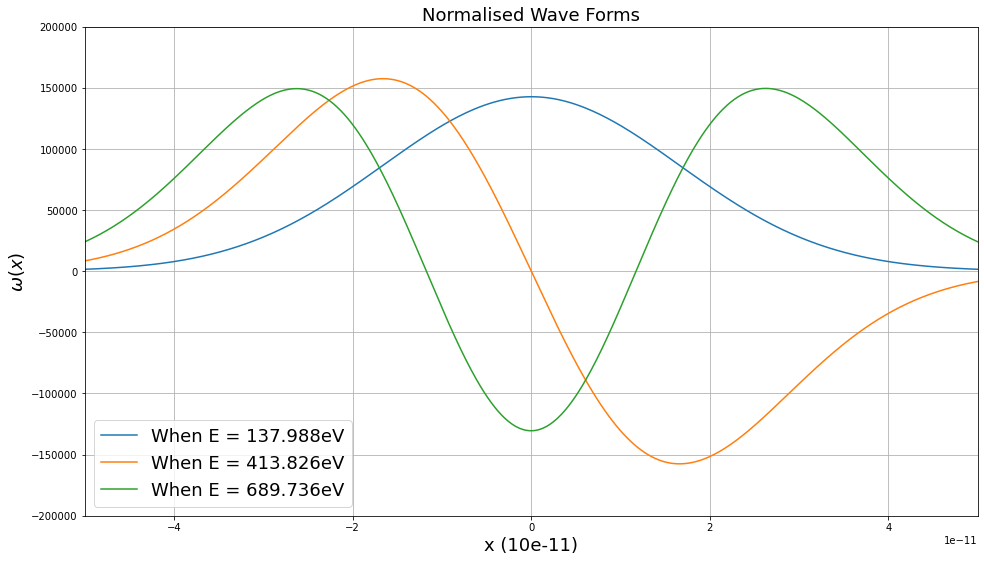

In [2]:
""" My Code """
# solution to parts (b), (c)
# YOUR CODE HERE
a = 1.0e-11


def eqn2(x, y, energy):
    """Eqn 2"""
    w_, dw_ = y
    V_0 = 50 * e_el
    V_ = V_0 * ((x * x) / (a * a))
    f_0 = dw_
    f_1 = (-2.0 * m_el / (hbar * hbar)) * (energy * w_ - V_ * w_)
    # f_1 = -2m/h^2 ( Ew-Vw )
    return [f_0, f_1]


def solve2(energy):
    """Solve 2"""
    x_range = [-10 * a, 10 * a]
    x_eval = np.linspace(x_range[0], x_range[1], 1000)
    init = [0, 1]
    answer = solve_ivp(eqn2, x_range, init, args=(energy,), t_eval=x_eval)
    return answer.y[0, -1]


def solve3(energy):
    """Solve 3"""
    x_range = [-10 * a, 10 * a]
    x_eval = np.linspace(x_range[0], x_range[1], 1000)
    init = [0, 1]
    answer = solve_ivp(eqn2, x_range, init, args=(energy,), t_eval=x_eval)
    return answer


e_1 = bisect(solve2, 100 * e_el, 200 * e_el, xtol=1e-22)
e_2 = bisect(solve2, 200 * e_el, 1000 * e_el, xtol=1e-22)
e_3 = bisect(solve2, e_2, 900 * e_el, xtol=1e-22)
difference = e_2 - e_1


def result():
    """Result Function"""
    return difference / e_el


E_1 = solve3(e_1)
E_2 = solve3(e_2)
E_3 = solve3(e_3)
E_1y = E_1.y[0] / np.sqrt(trapezoid(np.abs(E_1.y[0]) ** 2, x=E_1.t))
E_2y = E_2.y[0] / np.sqrt(trapezoid(np.abs(E_2.y[0]) ** 2, x=E_2.t))
E_3y = E_3.y[0] / np.sqrt(trapezoid(np.abs(E_3.y[0]) ** 2, x=E_3.t))
plt.figure(figsize=(16, 9))
plt.title("Normalised Wave Forms", fontsize=18)
plt.grid(True)
plt.xlim(-5 * a, 5 * a)
plt.ylim(-2e5, 2e5)
plt.xlabel("x (10e-11)", fontsize=18)
plt.ylabel(r"$\omega(x)$", fontsize=18)
plt.plot(E_1.t, E_1y, label=f"When E = {round(e_1/e_el,3)}eV")
plt.plot(E_2.t, E_2y, label=f"When E = {round(e_2/e_el,3)}eV")
plt.plot(E_3.t, E_3y, label=f"When E = {round(e_3/e_el,3)}eV")
plt.legend(fontsize=18)
plt.show()


In [3]:
# Hidden test for (a)


In [4]:
# Test for (b)
assert (result()>275.0 and result()<277.0), 'wrong energy eigenvalue difference.'


### Tests 2 marks; Style 1 mark; Plot - 2 marks